In [42]:
import numpy as np

from cdcm import *

# System

A System is a collection of nodes. The node can be any object that inherits Node
class. The System could itself be a node of another system.
A system should satisfy following conditions:
- The system own its nodes.
- The system exposes its nodes as attributes.

## An Isolated system

Let us consider an isolated system consisting of three parameters: ```r, dt & sigma```, state ```x``` and variable ```y```. We have a transition function ```f``` for state ```x```. There is also an emission function ```g``` which gives noisy observation of ```x``` and assigns this to the variable ```y```. The DAG of the isolated system is shown below. The order of evaluation of this DAG based on topological sort will be: ```r, dt, x, sigma, f, g, y```.

Isolated system


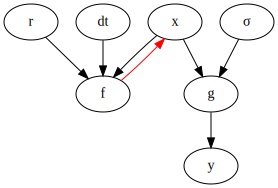

In [4]:
print('Isolated system')
from graphviz import Digraph
g = Digraph('Isolated system')
g.node('x')
g.node('r')
g.node('dt')
g.node('sigma', label='<&sigma;>')
g.node('y')
g.node('f')
g.node('g')
g.edge('x', 'f')
g.edge('r', 'f')
g.edge('dt', 'f')
g.edge('f', 'x', color="red")
g.edge('x', 'g')
g.edge('sigma', 'g')
g.edge('g', 'y')
#g.render('Function', format='png')
g

### Method 1 - Manual

In [43]:
# Creating parameters and states of the system

x = State(name="x", value=0.1, units="meters")
r = Parameter(name="r", value=1.2, units="meters/second")
dt = Parameter(name="dt", value=0.1, units="second")
sigma = Parameter(name="sigma", value=0.1, units="meters")
y = Variable(name="y", value=0, units="meters")

Let ```f``` be a transition function which updates ```x``` with ```x + r * dt```.

In [44]:
@make_function(x)
def f(x=x, r=r, dt=dt):
    """The transition function."""
    return x + r * dt

Let ```g``` be a function which gives noisy observation of ```x``` as ```y = x + sigma * np.random.randn()```.

In [45]:
@make_function(y)
def g(x=x, sigma=sigma):
    """An emission function."""
    return x + sigma * np.random.randn()

Let us create a System object called ```sys1``` with name = ```"sys1"``` and nodes = ```[x, r, dt, sigma, y, f, g]```

In [46]:
sys1 = System(
    name="sys1",
    description="An isolated system 1",
    nodes=[x, r, dt, sigma, y, f, g]
    )

We can print the system object, its states, parameters, nodes etc. When we print system states, parameters or nodes, a dictionary consisiting of State, Parameter or Node objects will be printed.

In [47]:
print(sys1)
print('----------states------')
print(sys1.states)
print('\n----------parameters------')
print(sys1.parameters)
print('\n----------nodes------')
print(sys1.nodes)

sys1:
  description: An isolated system 1
  owner: ''
  nodes:
    x:
      description: ''
      owner: sys1
      parents: ('f',)
      children: ('f', 'g')
      value: 0.1
      units: meters
      track: true
    r:
      description: ''
      owner: sys1
      parents: ()
      children: ('f',)
      value: 1.2
      units: meters/second
      track: true
    dt:
      description: ''
      owner: sys1
      parents: ()
      children: ('f',)
      value: 0.1
      units: second
      track: true
    sigma:
      description: ''
      owner: sys1
      parents: ()
      children: ('g',)
      value: 0.1
      units: meters
      track: true
    y:
      description: ''
      owner: sys1
      parents: ('g',)
      children: ()
      value: 0
      units: meters
      track: true
    f:
      description: The transition function.
      owner: sys1
      parents: ('x', 'r', 'dt')
      children: ('x',)
      func: !!python/name:__main__.f ''
    g:
      description: An emission fu

In [48]:
# We can access the nodes of the system like this:
print(sys1.x)
print(sys1.r)
print(sys1.dt)

x:
  description: ''
  owner: sys1
  parents: ('f',)
  children: ('f', 'g')
  value: 0.1
  units: meters
  track: true

r:
  description: ''
  owner: sys1
  parents: ()
  children: ('f',)
  value: 1.2
  units: meters/second
  track: true

dt:
  description: ''
  owner: sys1
  parents: ()
  children: ('f',)
  value: 0.1
  units: second
  track: true



In [49]:
print("Runing sys1 forward for 10 time steps:")
for i in range(10):
    sys1.forward()
    print(f"x: {sys1.x.value:1.3f}, y: {sys1.y.value:1.3f}")
    sys1.transition()

Runing sys1 forward for 10 time steps:
x: 0.100, y: -0.096
x: 0.220, y: 0.323
x: 0.340, y: 0.106
x: 0.460, y: 0.505
x: 0.580, y: 0.562
x: 0.700, y: 0.751
x: 0.820, y: 0.897
x: 0.940, y: 0.998
x: 1.060, y: 1.065
x: 1.180, y: 1.232


### Method 2 - Inheritance

In this method, a class called ```NewSystem``` which inherits the ```System``` class of CDCM is created. This NewSystem class has an attribute ```define_internal_nodes()``` inside which the nodes of the system are defined. When a ```NewSystem``` object is initialized, the ```define_internal_nodes()``` function is ran automatically. The system object keeps track of all the Nodes that are created inside ```define_internal_nodes()``` and adds them to its node list.

In [50]:
class NewSystem(System):

    def define_internal_nodes(self):
        """This function is ran automatically when the system is
        initialized. The system keeps track of all the Nodes that are
        created inside here and adds them to its node list."""

        x = State(name="x", value=0.1, units="meters")
        r = Parameter(name="r", value=1.2, units="meters/second")
        dt = Parameter(name="dt", value=0.1, units="second")
        sigma = Parameter(name="sigma", value=0.1, units="meters")
        y = Variable(name="y", value=0, units="meters")

        @make_function(x)
        def f(x=x, r=r, dt=dt):
            """The transition function."""
            return x + r * dt

        @make_function(y)
        def g(x=x, sigma=sigma):
            """An emission function."""
            return x + sigma * np.random.randn()

In [51]:
sys2 = NewSystem(name="sys2", description="An isolated system 2")

print(sys2)

sys2:
  description: An isolated system 2
  owner: ''
  nodes:
    x:
      description: ''
      owner: sys2
      parents: ('f',)
      children: ('f', 'g')
      value: 0.1
      units: meters
      track: true
    r:
      description: ''
      owner: sys2
      parents: ()
      children: ('f',)
      value: 1.2
      units: meters/second
      track: true
    dt:
      description: ''
      owner: sys2
      parents: ()
      children: ('f',)
      value: 0.1
      units: second
      track: true
    sigma:
      description: ''
      owner: sys2
      parents: ()
      children: ('g',)
      value: 0.1
      units: meters
      track: true
    y:
      description: ''
      owner: sys2
      parents: ('g',)
      children: ()
      value: 0
      units: meters
      track: true
    f:
      description: The transition function.
      owner: sys2
      parents: ('x', 'r', 'dt')
      children: ('x',)
      func: !!python/name:__main__.f ''
    g:
      description: An emission fu

In [52]:
# We can access the nodes of the system like this:
print(sys2.x)
print(sys2.r)
print(sys2.dt)

x:
  description: ''
  owner: sys2
  parents: ('f',)
  children: ('f', 'g')
  value: 0.1
  units: meters
  track: true

r:
  description: ''
  owner: sys2
  parents: ()
  children: ('f',)
  value: 1.2
  units: meters/second
  track: true

dt:
  description: ''
  owner: sys2
  parents: ()
  children: ('f',)
  value: 0.1
  units: second
  track: true



In [53]:
print("Runing sys2 forward for 10 time steps:")
for i in range(10):
    sys2.forward()
    print(f"x: {sys2.x.value:1.3f}, y: {sys2.y.value:1.3f}")
    sys2.transition()

Runing sys2 forward for 10 time steps:
x: 0.100, y: 0.011
x: 0.220, y: 0.271
x: 0.340, y: 0.360
x: 0.460, y: 0.522
x: 0.580, y: 0.364
x: 0.700, y: 0.698
x: 0.820, y: 0.829
x: 0.940, y: 1.067
x: 1.060, y: 1.227
x: 1.180, y: 1.250


### Method 3 - Inheritance but with decorators

This is a modification to Method 2. Here we can directly create the ```System``` object using the decorator ```@make_system``` as shown below.

In [54]:
@make_system
def sys3():
    """An isolated system 3."""
    x = State(name="x", value=0.1, units="meters")
    r = Parameter(name="r", value=1.2, units="meters/second")
    dt = Parameter(name="dt", value=0.1, units="second")
    sigma = Parameter(name="sigma", value=0.1, units="meters")
    y = Variable(name="y", value=0, units="meters")

    @make_function(x)
    def f(x=x, r=r, dt=dt):
        """The transition function."""
        return x + r * dt

    @make_function(y)
    def g(x=x, sigma=sigma):
        """An emission function."""
        return x + sigma * np.random.randn()

In [55]:
print(sys3)

sys3:
  description: An isolated system 3.
  owner: ''
  nodes:
    x:
      description: ''
      owner: sys3
      parents: ('f',)
      children: ('f', 'g')
      value: 0.1
      units: meters
      track: true
    r:
      description: ''
      owner: sys3
      parents: ()
      children: ('f',)
      value: 1.2
      units: meters/second
      track: true
    dt:
      description: ''
      owner: sys3
      parents: ()
      children: ('f',)
      value: 0.1
      units: second
      track: true
    sigma:
      description: ''
      owner: sys3
      parents: ()
      children: ('g',)
      value: 0.1
      units: meters
      track: true
    y:
      description: ''
      owner: sys3
      parents: ('g',)
      children: ()
      value: 0
      units: meters
      track: true
    f:
      description: The transition function.
      owner: sys3
      parents: ('x', 'r', 'dt')
      children: ('x',)
      func: !!python/name:__main__.f ''
    g:
      description: An emission f

In [56]:
# We can access the nodes of the system like this:
print(sys3.x)
print(sys3.r)
print(sys3.dt)
print(sys3.name)

x:
  description: ''
  owner: sys3
  parents: ('f',)
  children: ('f', 'g')
  value: 0.1
  units: meters
  track: true

r:
  description: ''
  owner: sys3
  parents: ()
  children: ('f',)
  value: 1.2
  units: meters/second
  track: true

dt:
  description: ''
  owner: sys3
  parents: ()
  children: ('f',)
  value: 0.1
  units: second
  track: true

sys3


In [57]:
print("Runing sys3 forward for 10 time steps:")
for i in range(10):
    sys3.forward()
    print(f"x: {sys3.x.value:1.3f}, y: {sys3.y.value:1.3f}")
    sys3.transition()

Runing sys3 forward for 10 time steps:
x: 0.100, y: -0.151
x: 0.220, y: 0.175
x: 0.340, y: 0.389
x: 0.460, y: 0.285
x: 0.580, y: 0.643
x: 0.700, y: 0.755
x: 0.820, y: 0.888
x: 0.940, y: 1.070
x: 1.060, y: 0.998
x: 1.180, y: 1.320


### Method 4 - Using Context Manager 'with'

In this method, the nodes are declared under the context of the corresponding ```System``` object. Python ```with``` statement is used here as context manager.

In [58]:
with System(name="sys4", description="An isolated system 4") as sys4:
    x = State(name="x", value=0.1, units="meters")
    r = Parameter(name="r", value=1.2, units="meters/second")
    dt = Parameter(name="dt", value=0.1, units="second")
    sigma = Parameter(name="sigma", value=0.1, units="meters")
    y = Variable(name="y", value=0, units="meters")

    @make_function(x)
    def f(x=x, r=r, dt=dt):
        """The transition function."""
        return x + r * dt

    @make_function(y)
    def g(x=x, sigma=sigma):
        """An emission function."""
        return x + sigma * np.random.randn()
print(sys4)

sys4:
  description: An isolated system 4
  owner: ''
  nodes:
    x:
      description: ''
      owner: sys4
      parents: ('f',)
      children: ('f', 'g')
      value: 0.1
      units: meters
      track: true
    r:
      description: ''
      owner: sys4
      parents: ()
      children: ('f',)
      value: 1.2
      units: meters/second
      track: true
    dt:
      description: ''
      owner: sys4
      parents: ()
      children: ('f',)
      value: 0.1
      units: second
      track: true
    sigma:
      description: ''
      owner: sys4
      parents: ()
      children: ('g',)
      value: 0.1
      units: meters
      track: true
    y:
      description: ''
      owner: sys4
      parents: ('g',)
      children: ()
      value: 0
      units: meters
      track: true
    f:
      description: The transition function.
      owner: sys4
      parents: ('x', 'r', 'dt')
      children: ('x',)
      func: !!python/name:__main__.f ''
    g:
      description: An emission fu

In [59]:
# We can access the nodes of the system like this:
print(sys4.x)
print(sys4.r)
print(sys4.dt)

x:
  description: ''
  owner: sys4
  parents: ('f',)
  children: ('f', 'g')
  value: 0.1
  units: meters
  track: true

r:
  description: ''
  owner: sys4
  parents: ()
  children: ('f',)
  value: 1.2
  units: meters/second
  track: true

dt:
  description: ''
  owner: sys4
  parents: ()
  children: ('f',)
  value: 0.1
  units: second
  track: true



In [60]:
print("Runing sys4 forward for 10 time steps:")
for i in range(10):
    sys4.forward()
    print(f"x: {sys4.x.value:1.3f}, y: {sys4.y.value:1.3f}")
    sys4.transition()

Runing sys4 forward for 10 time steps:
x: 0.100, y: 0.016
x: 0.220, y: 0.205
x: 0.340, y: 0.406
x: 0.460, y: 0.587
x: 0.580, y: 0.576
x: 0.700, y: 0.812
x: 0.820, y: 0.859
x: 0.940, y: 0.865
x: 1.060, y: 1.241
x: 1.180, y: 1.013


Unlike method 1, in methods 2 - 4, nodes are created under the context of their system so that they automatically become nodes of their system. No need to manually add nodes to the system after they are defined.